In [ ]:
Иванов Денис 
Домашняя работа №4  Виды распределений

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import ssl
%matplotlib inline

Загрузить таблицу и построить график распределений. Найти нормальное распределение.
Таблица цен на дома в Бостоне

Основные значения:
CRIM:   уровень преступности на душу населения по городам
ZN:     доля жилой земли, зонированной для участков более 25 000 кв футов
INDUS:  доля не торговых площадей в каждом городе
CHAS:   фиктивная переменная реки Чарльз (она равна 1, если тракт ограничивает реку; 0 в противном случае)
NOX:    концентрация оксидов азота (частей на 10 миллионов)
RM:     среднее количество комнат на одно жилище
AGE:    доля занятых владельцем единиц, построенных до 1940 года
DIS:    взвешенные расстояния до пяти бостонских центров занятости
RAD:    показатель доступности радиальных магистралей
TAX:    полная стоимость налога на имущество на 10 000 долларов
PTRATIO: соотношение учеников и учителей по городам
B:      доля людей афроамериканского происхождения (1000 (Bk - 0,63) ² )
LSTAT:  доля населения нижнего статуса / бедность 
MEDV:   средняя стоимость домов, занимаемых владельцами, в 1000 долларов

In [61]:
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [62]:
data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


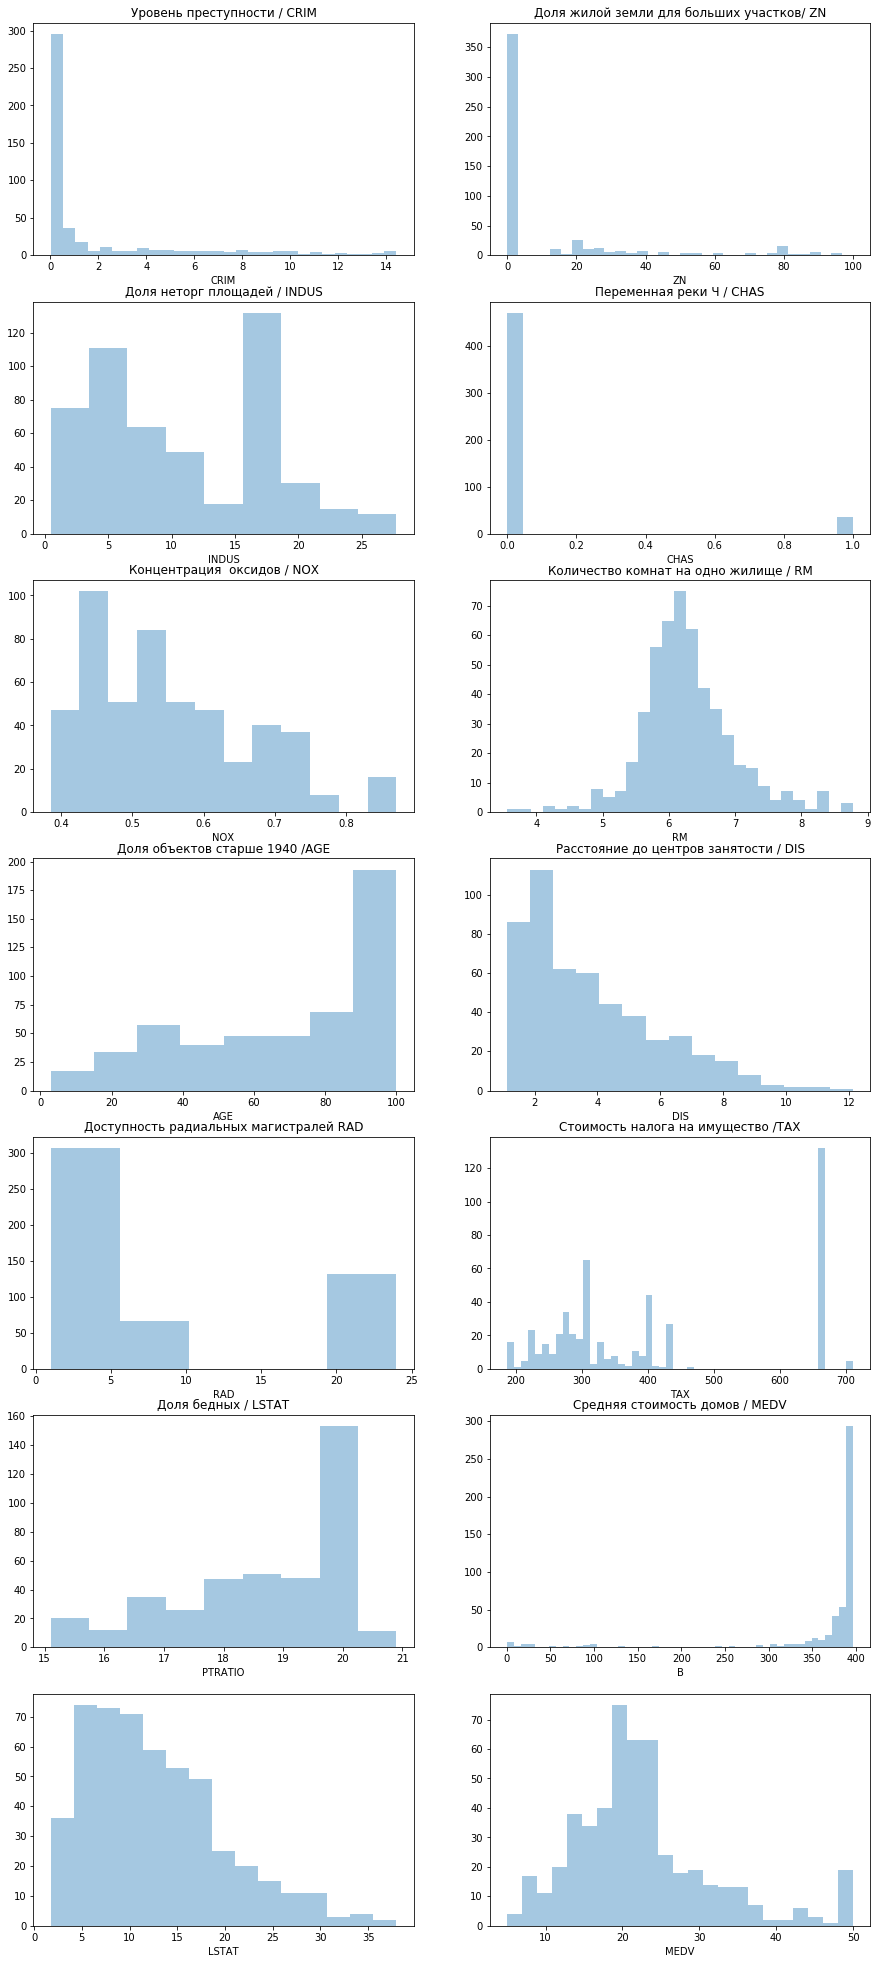

In [63]:
fig, ((ax_crim, ax_zn), 
      (ax_ind, ax_chas), 
      (ax_nox, ax_rm),
      (ax_age, ax_dis),
      (ax_rad, ax_tax),
      (ax_ptr, ax_b),
      (ax_lstat, ax_medv)
     )  = plt.subplots(nrows = 7, ncols = 2, figsize = (15, 35))

crime = data.CRIM[(data.CRIM<15)&(data.CRIM>0.01)]
ptr  = data.PTRATIO[(data.PTRATIO<21)&(data.PTRATIO>15)]
rad_ = data.RAD[(data.RAD<1000)]


ax_crim.set_title('Уровень преступности / CRIM')
sns.distplot(crime,  kde = False, ax = ax_crim)

ax_zn.set_title('Доля жилой земли для больших участков/ ZN')
sns.distplot(data['ZN'], kde = False, ax = ax_zn)

ax_ind.set_title('Доля неторг площадей / INDUS')
sns.distplot(data['INDUS'], kde = False, ax = ax_ind)

ax_chas.set_title('Переменная реки Ч / CHAS')
sns.distplot(data['CHAS'], kde = False, ax = ax_chas)

ax_nox.set_title('Концентрация  оксидов / NOX')
sns.distplot(data['NOX'], kde = False, ax = ax_nox)

ax_rm.set_title('Количество комнат на одно жилище / RM')
sns.distplot(data['RM'], kde = False, ax = ax_rm)

ax_age.set_title('Доля объектов старше 1940 /AGE')
sns.distplot(data['AGE'], kde = False, ax = ax_age)

ax_dis.set_title('Расстояние до центров занятости / DIS')
sns.distplot(data['DIS'], kde = False, ax = ax_dis)

ax_rad.set_title('Доступность радиальных магистралей RAD')
sns.distplot(data['RAD'], kde = False, ax = ax_rad)

ax_tax.set_title('Стоимость налога на имущество /TAX')
sns.distplot(data['TAX'], bins = 50, kde = False, ax = ax_tax)

ax_ptr.set_title('Соотношение учеников и учителей / PTRATIO')
sns.distplot(ptr, kde = False, ax = ax_ptr)

ax_b.set_title('Доля афроамериканцев / B')
sns.distplot(data['B'], kde = False, ax = ax_b)

ax_ptr.set_title('Доля бедных / LSTAT')
sns.distplot(data['LSTAT'], kde = False, ax = ax_lstat)

ax_b.set_title('Средняя стоимость домов / MEDV')
sns.distplot(data['MEDV'], kde = False, ax = ax_medv)
plt.show()

In [ ]:
Касательно видов распределений в представленных графиках можно сделать следующие выводы:
    
    Все распределения кроме CHAS соответствуют признакам непрерывности, это есть
показатели средних, могут принимать любые значения (как целые так и дробные), 
потенциально непрерывны

    Пердварительная классификация по видам распределений исходя из визуального анализа 
    графиков распределений и поверхностного анализа содержания показателей):            
Нормальное:           MEDV, RM
Равномерное:          не выявлено  
Биноминальное         PTRATIO
Бернулли              CHAS  
Геометрическое        не выявлено
Логнормальное         DIS 
Экспоненциальное:     CRIM   
Экспоненциальное 
обратное              В    

In [ ]:
Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут 
(несколько атрибутов) с ценой на дома (MEDV).

In [64]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [65]:
print('К числу показателей, максимально коррелирующих с ценой дома / MEDV / относятся:')
print('Lstat, CORR=', round(data.corr()['MEDV']['LSTAT'],3) , 'чем выше уровень бедности по региону, тем ниже стоимость недвижимости/средний уровень корреляции')
print('Lstat, CORR=', round(data.corr()['MEDV']['RM'],3),' чем больше количество комнат, тем выше стоимость жилища/средний уровень корреляции')

К числу показателей, максимально коррелирующих с ценой дома / MEDV / относятся:
Lstat, CORR= -0.738 чем выше уровень бедности по региону, тем ниже стоимость недвижимости/средний уровень корреляции
Lstat, CORR= 0.695  чем больше количество комнат, тем выше стоимость жилища/средний уровень корреляции


In [66]:
Написать линейную регрессию на два атрибута. 
Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, 
зная что цена на дом имеет линейную зависимость с атрибутом LSTAT.
Разделить данные на 80% тренировочных, 20% тестовых
Составить модель линейной регрессии
Посчитать ошибку модели на тестовых данных
Сделать точечный график данных и полученной прямой линейной регрессии

SyntaxError: invalid syntax (<ipython-input-66-239087102e80>, line 1)

Ошибка модели тестовых данных составит 0.5703151857755661


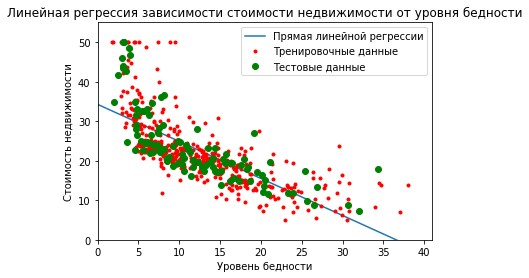

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

bednost = np.array(data.LSTAT).reshape(-1,1)
st_nedv = np.array(data.MEDV).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    bednost,
    st_nedv,
    test_size = 0.2
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

print ('Ошибка модели тестовых данных составит', model.score(X_test, y_test))
plt.figure(figsize=(6,4))
plt.xlabel('Уровень бедности')
plt.ylabel('Стоимость недвижимости')
plt.title('Линейная регрессия зависимости стоимости недвижимости от уровня бедности')
x = np.linspace(0, 60, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,41)
plt.ylim(0,55)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [ ]:
Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [68]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data2=pd.read_csv(url)
data2.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [69]:
data2.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [70]:
data2.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


In [74]:
#Сколько в данной таблице отсутствующих значений? Написать ответ. 
print('Общее количество отсутствующих значений в таблице - ', data2.isnull().values.sum())

Общее количество отсутствующих значений в таблице -  23


In [75]:
#Если есть отсутствующие значения в выборке country, убрать (drop).
data2['Country (region)'].isnull().values.sum()
print('Количество отсутствующих значений в по полю Country - ', data2['Country (region)'].isnull().values.sum(), ',  удалять нечего.')

Количество отсутствующих значений в по полю Country -  0 ,  удалять нечего.


In [ ]:
Сколько стран в выборке? Написать ответ.

In [24]:
print('Количество стран в выборке - ',  data2['Country (region)'].nunique())

Количество стран в выборке -  156


In [ ]:
Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [25]:
data2.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


In [26]:
# Наибольший уровень корреляции зафиксирован в рамках групп показателей, связанных 
# с общем уровнем развития экономики и развитием здравоохранения
# предполагаю, что эти показатели связаны между собой, рассчитываются в одной логике и
# не могут одновременно быть использованы в модели:
data2.corr().iloc[[0,4,8,9], [0,4,8,9]]

,Ladder,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.817842,0.813367,0.816740
Social support,0.817842,1.000000,0.772912,0.740728
Log of GDP\nper capita,0.813367,0.772912,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.740728,0.847580,1.000000


In [76]:
# также на уровень удовлетворенности жизни сильно влияет степень личной свободы 
data2.corr().iloc[[0,5], [0,5]]

# Для построения наиболее объемной статистической модели факторов, влияющих на удовлетворенность жизнью
# в рамках представленных ограничений считаю целесообразным сочетание факторов ВВП на душу населения и
# Степень личной свободы как наименее зависимых между собой по сути и методологии расчета

,Ladder,Freedom
Ladder,1.000000,0.546777
Freedom,0.546777,1.000000


In [ ]:
Дискретное распределение случайной величины
Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. 
Какое это распределение?

Произвольная малая выборка [4 3 5 5 5 5]
Не возможно произвести устойчивое суждение о качестве распределения, с каждой итерацией оно разное


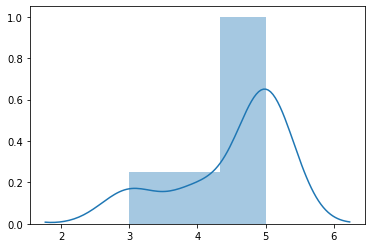

In [79]:
distr_1 = np.zeros(6)
distr_1 = np.random.randint(1, 6, 6)   
print('Произвольная малая выборка', distr_1)
print('Не возможно произвести устойчивое суждение о качестве распределения, с каждой итерацией оно разное')
# plt.hist(distr_1)sns.distplot(distr_1)  
sns.distplot(distr_1)

In [ ]:
Смоделируйте 1000 раз сумму по 100 подбрасываний. 
Начертите диаграму histogram. Почему график изменился? 
Почему можно применить центральную предельную теорему?

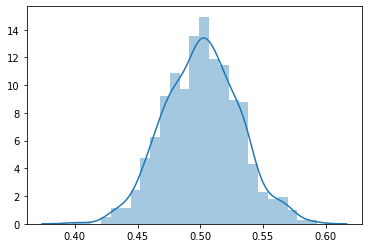

In [59]:
distr_2 = np.zeros(1000)
for i in range(1000):
    distr_2[i] = np.sum(np.random.rand(100))/100
sns.distplot(distr_2)

In [ ]:
# График изменился потому, что 
# при увеличении количества наблюдений случайность отдельной выборки перестает быть значимой 
# для распределения плотности вероятности отдельных типовых (слабо зависимых между собой ) событий
# распределение вероятности (по умолчанию) стремится к нормальному при увеличении количества наблюдений